In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os, sys

### Input Data

In [13]:
palette = {
    'Forest Formation':'#006400', 
    'Pasture':'#ffd966', 
    'Agriculture':'#e974ed', 
    'Grassland':'#b8af4f',
    'Savanna Formation':'#00ff00',
    'Wetland':'#45c2a5' 
}

classes = '","'.join(list(dict(palette).keys()))

df_support_samples = pd.read_csv(os.path.abspath('../data/support_samples/support_samples_2022_225060_1.csv'))
df_support_samples['classification'] = df_support_samples['classification'].astype(int)

water_grassland = df_support_samples.query('classification == 33 or classification == 12')

df_support_samples = df_support_samples[["gv", "gvs", "soil", "npv", "ndfi", "csfi", "shade",'classification', 'tile', 'landsat_id_scene', 'year']]

df_support_samples.groupby(by=['classification']).count().reset_index()

,classification,gv,gvs,soil,npv,ndfi,csfi,shade,tile,landsat_id_scene,year
0,3,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209
1,4,108,108,108,108,108,108,108,108,108,108
2,12,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571
3,15,5,5,5,5,5,5,5,5,5,5
4,33,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272


### Transpose table

In [10]:
pivot_table = pd.melt(
    water_grassland, id_vars=['classification'], 
    value_vars=["gv", "gvs", "soil", "npv", "ndfi", "csfi", "shade"])


### Chart

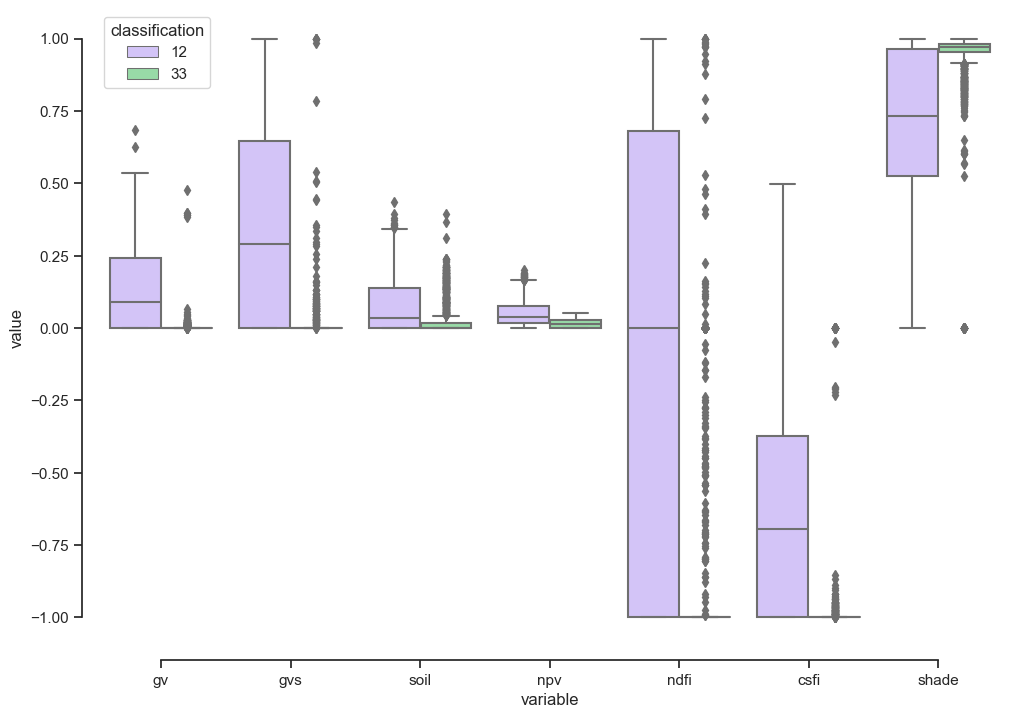

In [11]:
sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(11.7, 8.27))

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="variable", y="value", ax=ax,
            hue="classification", palette=["m", "g"],
            data=pivot_table)
sns.despine(offset=10, trim=True)

In [12]:
import pandas as pd
import numpy as np
from scipy import stats

images = df_support_samples['landsat_id_scene'].drop_duplicates().values
classes = df_support_samples['classification'].drop_duplicates().values
df_filtered = pd.DataFrame({
    "gv":[], 
    "gvs":[], 
    "soil":[], 
    "npv":[], 
    "ndfi":[], 
    "csfi":[], 
    "shade":[],
    "classification":[],
    "tile":[],
    "landsat_id_scene":[],
    "year":[]
})

for img in images[:1]:
    for c in classes:
        df = df_support_samples.query('classification == {} and landsat_id_scene == "{}"'.format(c, img))
        df = df[(np.abs(stats.zscore(df[["gv", "gvs", "soil", "npv", "ndfi", "csfi", "shade"]])) < 3).all(axis=1)]
        df_filtered = pd.concat([df_filtered, df])




NameError: name 'df_samples_used' is not defined